<a href="https://colab.research.google.com/github/rgozun/Credit-Default-Prediction/blob/main/UCI_Credit_Default_Prediction_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Credit Payment Default
Ralph Gozun
Data Host: UCI Machine Learning Repository
Host URL: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Abstract: This work serves to test different predictive algorithms aiming to accurately determine if a banking customer will default on their loan repayments.

Metadata: This research employed a binary variable:

* default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('precision', 2)

In [ ]:
#### Bring in Data ####
df_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(df_url,header=1)
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [ ]:
# Remove ID column after assigning it to index
ID = df.columns[0]
df = df.drop(columns='ID')
print(df)

       LIMIT_BAL  SEX  ...  PAY_AMT6  default payment next month
0          20000    2  ...         0                           1
1         120000    2  ...      2000                           1
2          90000    2  ...      5000                           0
3          50000    2  ...      1000                           0
4          50000    1  ...       679                           0
...          ...  ...  ...       ...                         ...
29995     220000    1  ...      1000                           0
29996     150000    1  ...         0                           0
29997      30000    1  ...      3100                           1
29998      80000    1  ...      1804                           1
29999      50000    1  ...      1000                           1

[30000 rows x 24 columns]


In [ ]:
# Create Categorical Vars
col_dtypes = pd.DataFrame(df.dtypes)
col_dtypes.reset_index(inplace=True)
col_dtypes.columns = ['Feature','DataType']

for feat in col_dtypes['Feature']:
  if df[feat].nunique() < 15:
    df[feat] = df[feat].astype('category')
  else:
    pass
df.dtypes

In [ ]:
X, y = df.iloc[:,1:23], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.10, random_state=1)
print(X_train.head(n=2),X_test.head(n=2),y_test.head(n=2))

      SEX EDUCATION MARRIAGE  AGE  ... PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
13099   1         2        2   26  ...     1300     1300     1500     1500
4704    1         2        2   46  ...      480     3650      600        0

[2 rows x 22 columns]       SEX EDUCATION MARRIAGE  AGE  ... PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
10747   1         3        1   32  ...     4000     3000     1000     2000
12573   2         3        1   49  ...     2828        0      182        0

[2 rows x 22 columns] 10747    0
12573    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]


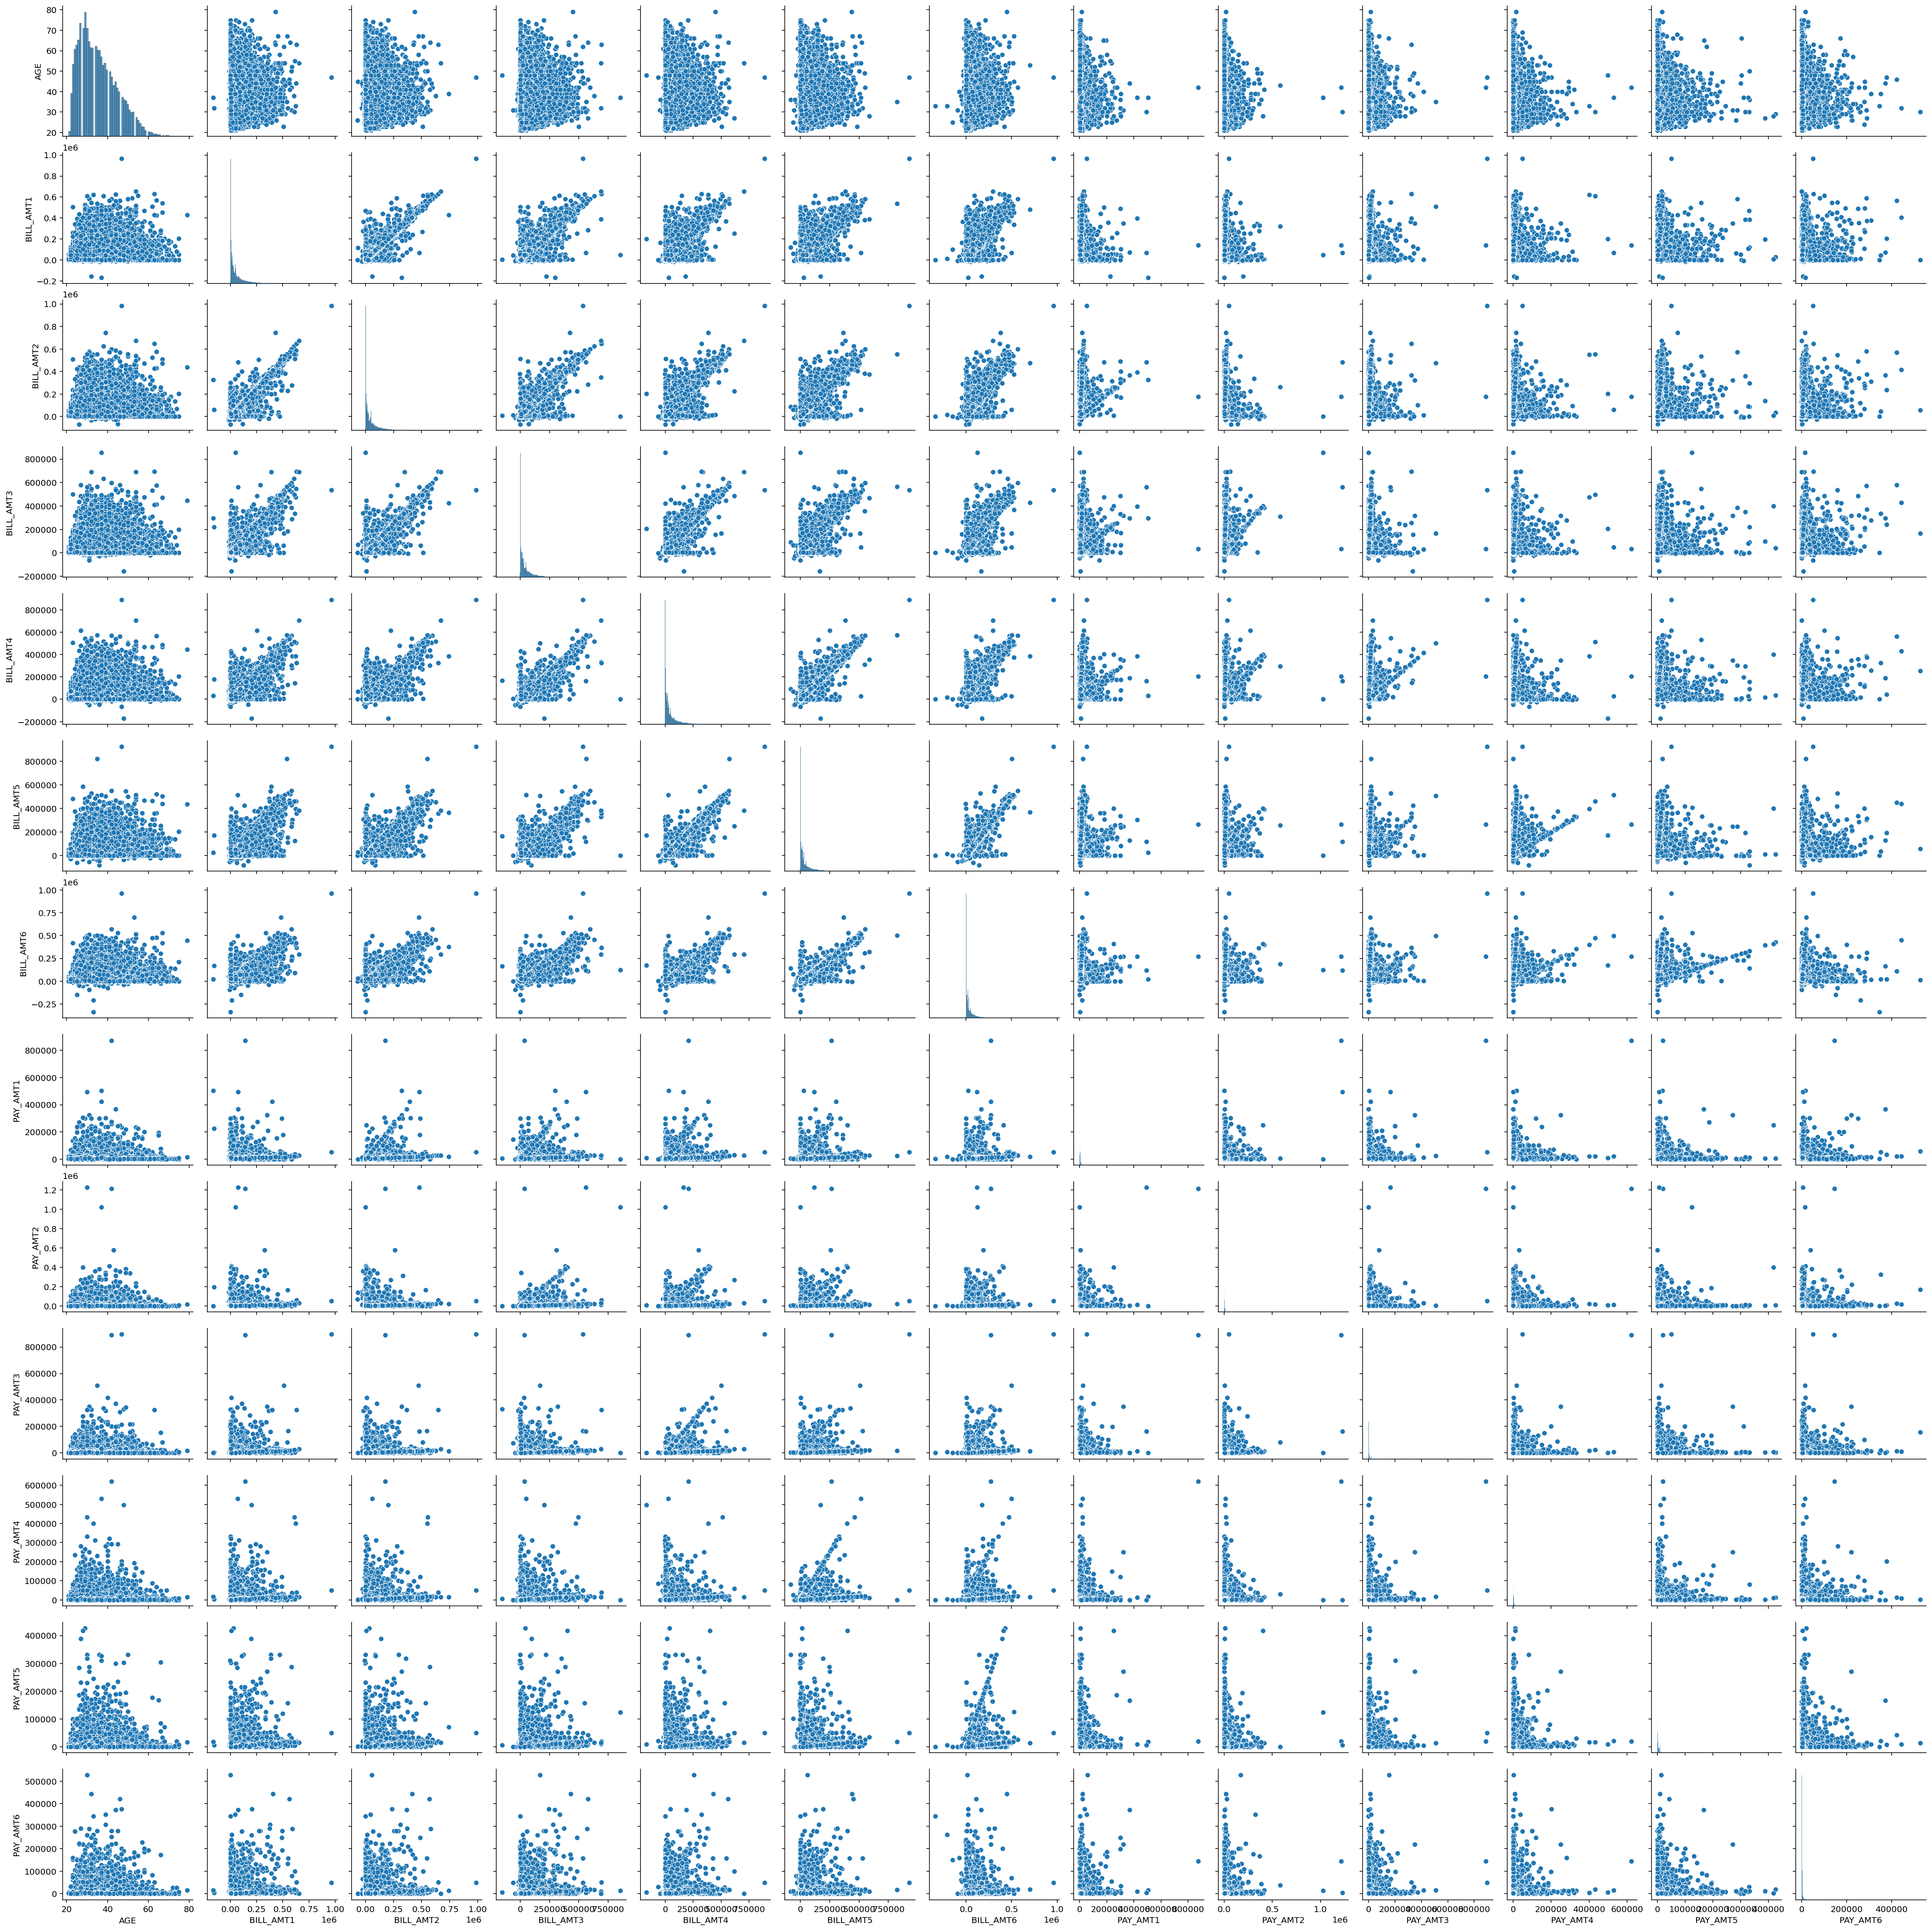

In [173]:
sns.pairplot(X_train)

In [1]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

NameError: ignored